In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
UF = 'CE'
df = pd.read_csv("../data/%s/mun_sih_flow.csv"%UF)

In [3]:
years = df['year'].unique()
total_years = years[-1] - years[0]
total_years

26

In [4]:
mean_df = df.groupby(by = ['from','to'], as_index = False).mean()
mean_df

from  \
0     {'latlong': [-37.410596244264084, -4.738610579...   
1     {'latlong': [-37.410596244264084, -4.738610579...   
2     {'latlong': [-37.410596244264084, -4.738610579...   
3     {'latlong': [-37.410596244264084, -4.738610579...   
4     {'latlong': [-37.410596244264084, -4.738610579...   
...                                                 ...   
5278  {'latlong': [-41.232563195049785, -3.092644552...   
5279  {'latlong': [-41.232563195049785, -3.092644552...   
5280  {'latlong': [-41.232563195049785, -3.092644552...   
5281  {'latlong': [-41.232563195049785, -3.092644552...   
5282  {'latlong': [-41.232563195049785, -3.092644552...   

                                                     to         year  \
0     {'latlong': [-37.410596244264084, -4.738610579...  2002.500000   
1     {'latlong': [-37.68550527511248, -4.6809824743...  2007.000000   
2     {'latlong': [-38.11290706347188, -4.4017305619...  1997.000000   
3     {'latlong': [-38.14825427713251, -4.8438138114...  2005.444444   
4     {'latlong': [-38.29708705669224, -4.2390867029...  2018.000000   
...                                                 ...          ...   
5278  {'latlong': [-40.64877701053505, -3.1696418306...  2006.000000   
5279  {'latlong': [-40.726363392606615, -3.641520060...  2014.000000   
5280  {'latlong': [-40.800891199400326, -2.949806802...  2007.000000   
5281  {'latlong': [-41.00170421006431, -3.2306096104...  2013.400000   
5282  {'latlong': [-41.232563195049785, -3.092644552...  2005.695652   

      hospitalizations    distance  
0           297.722222    0.000000  
1           263.925926   30.933649  
2             1.000000   83.411471  
3             9.444444   82.397223  
4             1.000000  107.768481  
...                ...         ...  
5278          2.000000   65.154496  
5279          1.000000   72.759852  
5280        112.444444   49.421627  
5281         11.000000   28.135110  
5282        548.913043    0.000000  

[5283 rows x 5 columns]

In [5]:
soma = mean_df["hospitalizations"].sum()
soma

521949.39763614285

In [6]:
count_flows = mean_df["hospitalizations"].describe()['count']
mean_df["hospitalizations"].describe()

count      5283.000000
mean         98.797917
std        2111.998173
min           1.000000
25%           1.000000
50%           1.500000
75%           5.000000
max      150125.037037
Name: hospitalizations, dtype: float64

In [7]:
mean_df = mean_df.sort_values(by='hospitalizations', ascending=False)
mean_df

from  \
770   {'latlong': [-38.52800064797039, -3.7858328550...   
3962  {'latlong': [-40.227869862489094, -3.811040804...   
2517  {'latlong': [-39.28616476612853, -7.1828142004...   
2968  {'latlong': [-39.48993686759938, -7.2356467539...   
1438  {'latlong': [-38.80969126229017, -3.7835902658...   
...                                                 ...   
2605  {'latlong': [-39.33320928888799, -5.2455473036...   
2607  {'latlong': [-39.33320928888799, -5.2455473036...   
2608  {'latlong': [-39.33320928888799, -5.2455473036...   
2611  {'latlong': [-39.33320928888799, -5.2455473036...   
2641  {'latlong': [-39.33320928888799, -5.2455473036...   

                                                     to    year  \
770   {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
3962  {'latlong': [-40.227869862489094, -3.811040804...  2007.0   
2517  {'latlong': [-39.28616476612853, -7.1828142004...  2007.0   
2968  {'latlong': [-39.48993686759938, -7.2356467539...  2007.0   
1438  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
...                                                 ...     ...   
2605  {'latlong': [-38.71346302265001, -4.4829644066...  2017.0   
2607  {'latlong': [-38.76236207029031, -4.2455952385...  1996.0   
2608  {'latlong': [-38.783410084247656, -6.389048182...  1995.0   
2611  {'latlong': [-38.851001712435895, -4.383357422...  2001.5   
2641  {'latlong': [-40.800891199400326, -2.949806802...  1996.0   

      hospitalizations    distance  
770      150125.037037    0.000000  
3962      12666.037037    0.000000  
2517      11385.222222    0.000000  
2968       9740.740741    0.000000  
1438       9062.925926   31.270851  
...                ...         ...  
2605          1.000000   95.365375  
2607          1.000000  107.281155  
2608          1.000000  116.281527  
2611          1.000000   91.812685  
2641          1.000000  254.767284  

[5283 rows x 5 columns]

In [8]:
def create_patient_table(flow_df):
    table = []
    for row in flow_df.values:
        for hosp in range(round(row[3])):
            table.append(list(row))
    return pd.DataFrame(table, columns=mean_df.keys())

In [9]:
final_df = create_patient_table(mean_df)
final_df

from  \
0       {'latlong': [-38.52800064797039, -3.7858328550...   
1       {'latlong': [-38.52800064797039, -3.7858328550...   
2       {'latlong': [-38.52800064797039, -3.7858328550...   
3       {'latlong': [-38.52800064797039, -3.7858328550...   
4       {'latlong': [-38.52800064797039, -3.7858328550...   
...                                                   ...   
522031  {'latlong': [-39.33320928888799, -5.2455473036...   
522032  {'latlong': [-39.33320928888799, -5.2455473036...   
522033  {'latlong': [-39.33320928888799, -5.2455473036...   
522034  {'latlong': [-39.33320928888799, -5.2455473036...   
522035  {'latlong': [-39.33320928888799, -5.2455473036...   

                                                       to    year  \
0       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
1       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
2       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
3       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
4       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
...                                                   ...     ...   
522031  {'latlong': [-38.71346302265001, -4.4829644066...  2017.0   
522032  {'latlong': [-38.76236207029031, -4.2455952385...  1996.0   
522033  {'latlong': [-38.783410084247656, -6.389048182...  1995.0   
522034  {'latlong': [-38.851001712435895, -4.383357422...  2001.5   
522035  {'latlong': [-40.800891199400326, -2.949806802...  1996.0   

        hospitalizations    distance  
0          150125.037037    0.000000  
1          150125.037037    0.000000  
2          150125.037037    0.000000  
3          150125.037037    0.000000  
4          150125.037037    0.000000  
...                  ...         ...  
522031          1.000000   95.365375  
522032          1.000000  107.281155  
522033          1.000000  116.281527  
522034          1.000000   91.812685  
522035          1.000000  254.767284  

[522036 rows x 5 columns]

In [10]:
final_df["hospitalizations"].describe()

count    522036.000000
mean      45230.824911
std       66708.198096
min           1.000000
25%         686.111111
50%        3240.629630
75%      150125.037037
max      150125.037037
Name: hospitalizations, dtype: float64

In [11]:
print(soma, soma/4)

521949.39763614285 130487.34940903571


In [12]:
final_df['flow'] = final_df.apply(lambda row : row['from']+row['to']+str(row['hospitalizations']), axis=1)

In [13]:
# Q4

q4 = final_df[final_df['hospitalizations'] >= final_df["hospitalizations"].describe()['75%']]
print(len(q4['flow'].unique()), "flow, percent =", 100*len(q4['flow'].unique())/count_flows)
q4

1 flow, percent = 0.01892863903085368


from  \
0       {'latlong': [-38.52800064797039, -3.7858328550...   
1       {'latlong': [-38.52800064797039, -3.7858328550...   
2       {'latlong': [-38.52800064797039, -3.7858328550...   
3       {'latlong': [-38.52800064797039, -3.7858328550...   
4       {'latlong': [-38.52800064797039, -3.7858328550...   
...                                                   ...   
150120  {'latlong': [-38.52800064797039, -3.7858328550...   
150121  {'latlong': [-38.52800064797039, -3.7858328550...   
150122  {'latlong': [-38.52800064797039, -3.7858328550...   
150123  {'latlong': [-38.52800064797039, -3.7858328550...   
150124  {'latlong': [-38.52800064797039, -3.7858328550...   

                                                       to    year  \
0       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
1       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
2       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
3       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
4       {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
...                                                   ...     ...   
150120  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
150121  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
150122  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
150123  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
150124  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   

        hospitalizations  distance  \
0          150125.037037       0.0   
1          150125.037037       0.0   
2          150125.037037       0.0   
3          150125.037037       0.0   
4          150125.037037       0.0   
...                  ...       ...   
150120     150125.037037       0.0   
150121     150125.037037       0.0   
150122     150125.037037       0.0   
150123     150125.037037       0.0   
150124     150125.037037       0.0   

                                                     flow  
0       {'latlong': [-38.52800064797039, -3.7858328550...  
1       {'latlong': [-38.52800064797039, -3.7858328550...  
2       {'latlong': [-38.52800064797039, -3.7858328550...  
3       {'latlong': [-38.52800064797039, -3.7858328550...  
4       {'latlong': [-38.52800064797039, -3.7858328550...  
...                                                   ...  
150120  {'latlong': [-38.52800064797039, -3.7858328550...  
150121  {'latlong': [-38.52800064797039, -3.7858328550...  
150122  {'latlong': [-38.52800064797039, -3.7858328550...  
150123  {'latlong': [-38.52800064797039, -3.7858328550...  
150124  {'latlong': [-38.52800064797039, -3.7858328550...  

[150125 rows x 6 columns]

In [14]:
# Q3

tmp = final_df[final_df['hospitalizations'] < final_df["hospitalizations"].describe()['75%']]
q3 = tmp[tmp['hospitalizations'] >= final_df["hospitalizations"].describe()['50%']]
print(len(q3['flow'].unique()), "flows, percent =", 100*len(q3['flow'].unique())/count_flows)
q3

18 flows, percent = 0.34071550255536626


from  \
150125  {'latlong': [-40.227869862489094, -3.811040804...   
150126  {'latlong': [-40.227869862489094, -3.811040804...   
150127  {'latlong': [-40.227869862489094, -3.811040804...   
150128  {'latlong': [-40.227869862489094, -3.811040804...   
150129  {'latlong': [-40.227869862489094, -3.811040804...   
...                                                   ...   
261138  {'latlong': [-37.68550527511248, -4.6809824743...   
261139  {'latlong': [-37.68550527511248, -4.6809824743...   
261140  {'latlong': [-37.68550527511248, -4.6809824743...   
261141  {'latlong': [-37.68550527511248, -4.6809824743...   
261142  {'latlong': [-37.68550527511248, -4.6809824743...   

                                                       to    year  \
150125  {'latlong': [-40.227869862489094, -3.811040804...  2007.0   
150126  {'latlong': [-40.227869862489094, -3.811040804...  2007.0   
150127  {'latlong': [-40.227869862489094, -3.811040804...  2007.0   
150128  {'latlong': [-40.227869862489094, -3.811040804...  2007.0   
150129  {'latlong': [-40.227869862489094, -3.811040804...  2007.0   
...                                                   ...     ...   
261138  {'latlong': [-37.68550527511248, -4.6809824743...  2007.0   
261139  {'latlong': [-37.68550527511248, -4.6809824743...  2007.0   
261140  {'latlong': [-37.68550527511248, -4.6809824743...  2007.0   
261141  {'latlong': [-37.68550527511248, -4.6809824743...  2007.0   
261142  {'latlong': [-37.68550527511248, -4.6809824743...  2007.0   

        hospitalizations  distance  \
150125      12666.037037       0.0   
150126      12666.037037       0.0   
150127      12666.037037       0.0   
150128      12666.037037       0.0   
150129      12666.037037       0.0   
...                  ...       ...   
261138       3240.629630       0.0   
261139       3240.629630       0.0   
261140       3240.629630       0.0   
261141       3240.629630       0.0   
261142       3240.629630       0.0   

                                                     flow  
150125  {'latlong': [-40.227869862489094, -3.811040804...  
150126  {'latlong': [-40.227869862489094, -3.811040804...  
150127  {'latlong': [-40.227869862489094, -3.811040804...  
150128  {'latlong': [-40.227869862489094, -3.811040804...  
150129  {'latlong': [-40.227869862489094, -3.811040804...  
...                                                   ...  
261138  {'latlong': [-37.68550527511248, -4.6809824743...  
261139  {'latlong': [-37.68550527511248, -4.6809824743...  
261140  {'latlong': [-37.68550527511248, -4.6809824743...  
261141  {'latlong': [-37.68550527511248, -4.6809824743...  
261142  {'latlong': [-37.68550527511248, -4.6809824743...  

[111018 rows x 6 columns]

In [15]:
# Q2

tmp = final_df[final_df['hospitalizations'] < final_df["hospitalizations"].describe()['50%']]
q2 = tmp[tmp['hospitalizations'] >= final_df["hospitalizations"].describe()['25%']]
print(len(q2['flow'].unique()), "flows, percent =", 100*len(q2['flow'].unique())/count_flows)
q2

98 flows, percent = 1.8550066250236608


from  \
261143  {'latlong': [-40.800891199400326, -2.949806802...   
261144  {'latlong': [-40.800891199400326, -2.949806802...   
261145  {'latlong': [-40.800891199400326, -2.949806802...   
261146  {'latlong': [-40.800891199400326, -2.949806802...   
261147  {'latlong': [-40.800891199400326, -2.949806802...   
...                                                   ...   
391742  {'latlong': [-39.57503511308205, -3.7327810025...   
391743  {'latlong': [-39.57503511308205, -3.7327810025...   
391744  {'latlong': [-39.57503511308205, -3.7327810025...   
391745  {'latlong': [-39.57503511308205, -3.7327810025...   
391746  {'latlong': [-39.57503511308205, -3.7327810025...   

                                                       to    year  \
261143  {'latlong': [-40.800891199400326, -2.949806802...  2007.0   
261144  {'latlong': [-40.800891199400326, -2.949806802...  2007.0   
261145  {'latlong': [-40.800891199400326, -2.949806802...  2007.0   
261146  {'latlong': [-40.800891199400326, -2.949806802...  2007.0   
261147  {'latlong': [-40.800891199400326, -2.949806802...  2007.0   
...                                                   ...     ...   
391742  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
391743  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
391744  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
391745  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   
391746  {'latlong': [-38.52800064797039, -3.7858328550...  2007.0   

        hospitalizations    distance  \
261143       3206.592593    0.000000   
261144       3206.592593    0.000000   
261145       3206.592593    0.000000   
261146       3206.592593    0.000000   
261147       3206.592593    0.000000   
...                  ...         ...   
391742        686.111111  116.328746   
391743        686.111111  116.328746   
391744        686.111111  116.328746   
391745        686.111111  116.328746   
391746        686.111111  116.328746   

                                                     flow  
261143  {'latlong': [-40.800891199400326, -2.949806802...  
261144  {'latlong': [-40.800891199400326, -2.949806802...  
261145  {'latlong': [-40.800891199400326, -2.949806802...  
261146  {'latlong': [-40.800891199400326, -2.949806802...  
261147  {'latlong': [-40.800891199400326, -2.949806802...  
...                                                   ...  
391742  {'latlong': [-39.57503511308205, -3.7327810025...  
391743  {'latlong': [-39.57503511308205, -3.7327810025...  
391744  {'latlong': [-39.57503511308205, -3.7327810025...  
391745  {'latlong': [-39.57503511308205, -3.7327810025...  
391746  {'latlong': [-39.57503511308205, -3.7327810025...  

[130604 rows x 6 columns]

In [16]:
# Q1

q1 = final_df[final_df['hospitalizations'] < final_df["hospitalizations"].describe()['25%']]
print(len(q1['flow'].unique()), "flows, percent =", 100*len(q1['flow'].unique())/count_flows)
q1

5166 flows, percent = 97.78534923339012


from  \
391747  {'latlong': [-40.40505745271666, -4.4325575731...   
391748  {'latlong': [-40.40505745271666, -4.4325575731...   
391749  {'latlong': [-40.40505745271666, -4.4325575731...   
391750  {'latlong': [-40.40505745271666, -4.4325575731...   
391751  {'latlong': [-40.40505745271666, -4.4325575731...   
...                                                   ...   
522031  {'latlong': [-39.33320928888799, -5.2455473036...   
522032  {'latlong': [-39.33320928888799, -5.2455473036...   
522033  {'latlong': [-39.33320928888799, -5.2455473036...   
522034  {'latlong': [-39.33320928888799, -5.2455473036...   
522035  {'latlong': [-39.33320928888799, -5.2455473036...   

                                                       to    year  \
391747  {'latlong': [-40.40505745271666, -4.4325575731...  2007.0   
391748  {'latlong': [-40.40505745271666, -4.4325575731...  2007.0   
391749  {'latlong': [-40.40505745271666, -4.4325575731...  2007.0   
391750  {'latlong': [-40.40505745271666, -4.4325575731...  2007.0   
391751  {'latlong': [-40.40505745271666, -4.4325575731...  2007.0   
...                                                   ...     ...   
522031  {'latlong': [-38.71346302265001, -4.4829644066...  2017.0   
522032  {'latlong': [-38.76236207029031, -4.2455952385...  1996.0   
522033  {'latlong': [-38.783410084247656, -6.389048182...  1995.0   
522034  {'latlong': [-38.851001712435895, -4.383357422...  2001.5   
522035  {'latlong': [-40.800891199400326, -2.949806802...  1996.0   

        hospitalizations    distance  \
391747             686.0    0.000000   
391748             686.0    0.000000   
391749             686.0    0.000000   
391750             686.0    0.000000   
391751             686.0    0.000000   
...                  ...         ...   
522031               1.0   95.365375   
522032               1.0  107.281155   
522033               1.0  116.281527   
522034               1.0   91.812685   
522035               1.0  254.767284   

                                                     flow  
391747  {'latlong': [-40.40505745271666, -4.4325575731...  
391748  {'latlong': [-40.40505745271666, -4.4325575731...  
391749  {'latlong': [-40.40505745271666, -4.4325575731...  
391750  {'latlong': [-40.40505745271666, -4.4325575731...  
391751  {'latlong': [-40.40505745271666, -4.4325575731...  
...                                                   ...  
522031  {'latlong': [-39.33320928888799, -5.2455473036...  
522032  {'latlong': [-39.33320928888799, -5.2455473036...  
522033  {'latlong': [-39.33320928888799, -5.2455473036...  
522034  {'latlong': [-39.33320928888799, -5.2455473036...  
522035  {'latlong': [-39.33320928888799, -5.2455473036...  

[130289 rows x 6 columns]

-----------------------------------

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

In [56]:
UF = 'RJ'
diag = 'circulatory_system_' #''

df = pd.read_csv("../data/%s/mun_%ssih_flow.csv"%(UF, diag))

# import the municipality-region-macroregion relations
reg_macro_df = pd.read_csv("../data/%s/reg_macro_table.csv"%(UF))

In [57]:
def is_same_region(row, region): # TEM ALGUM ERRO AQUI
    if(region == 'region'): 
        year = 2011
        if(row['year'] > 2011): year = row['year']
        if(row['year'] > 2017): year = 2017
    else: year = 2020
    tmp_df = reg_macro_df[reg_macro_df['year'] == year]
    if(tmp_df.empty): return None
    reg_1 = tmp_df[tmp_df['code'] == eval(row['from'])['code']][region]
    reg_2 = tmp_df[tmp_df['code'] == eval(row['to'])['code']][region]
    return reg_1.values[0] == reg_2.values[0]

In [58]:
df['same_region'] = df.apply(lambda row: is_same_region(row, 'region'), axis=1)
df['same_macroregion'] = df.apply(lambda row: is_same_region(row, 'macroregion'), axis=1)

In [59]:
df['Tipo de fluxo'] = 'Não cruzam regiões'
df.loc[df['same_region']==False, 'Tipo de fluxo'] = 'Cruzam regiões'
df.loc[df['same_macroregion']==False, 'Tipo de fluxo'] = 'Cruzam macroregiões'
df.head()

year                                               from  \
0  1994  {'latlong': [-41.93126326531407, -21.041649890...   
1  1994  {'latlong': [-43.450990322465735, -22.92319262...   
2  1994  {'latlong': [-42.19287912856915, -21.555615760...   
3  1995  {'latlong': [-41.89402488528784, -21.225097540...   
4  1995  {'latlong': [-43.1568323490067, -22.3979566354...   

                                                  to  hospitalizations  \
0  {'latlong': [-41.93126326531407, -21.041649890...                 1   
1  {'latlong': [-43.450990322465735, -22.92319262...                 1   
2  {'latlong': [-42.19287912856915, -21.555615760...                 1   
3  {'latlong': [-41.89402488528784, -21.225097540...                 2   
4  {'latlong': [-43.1568323490067, -22.3979566354...                 2   

   distance  same_region  same_macroregion       Tipo de fluxo  
0       0.0         True              True  Não cruzam regiões  
1       0.0         True              True  Não cruzam regiões  
2       0.0         True              True  Não cruzam regiões  
3       0.0         True              True  Não cruzam regiões  
4       0.0         True              True  Não cruzam regiões

In [60]:
import plotly.express as px

def plot_scatter(year):
    fig = px.scatter(df[df.year==year], x="distance", y="hospitalizations", log_y=True, color="Tipo de fluxo", #size="hospitalizations", size_max=30,
                     marginal_x="box", marginal_y="box", title='%s - Hospitalizations x Distance distribution %d - %s'%(UF, year, diag[:-1]))
    fig.update_xaxes(categoryorder='array', categoryarray= ['Não cruzam regiões', 'Cruzam regiões', 'Cruzam macroregiões'])
    fig.update_yaxes(categoryorder='array', categoryarray= ['Cruzam macroregiões', 'Cruzam regiões', 'Não cruzam regiões'])

    fig.update_layout(legend=dict(
        yanchor="top",
        y=0.69,
        xanchor="right",
        x=0.99
    ))

    fig.show()

In [61]:
plot_scatter(1999)
plot_scatter(2009)
plot_scatter(2019)

In [55]:
plot_scatter(1999)
plot_scatter(2009)
plot_scatter(2019)

In [47]:
plot_scatter(1999)
plot_scatter(2009)
plot_scatter(2019)

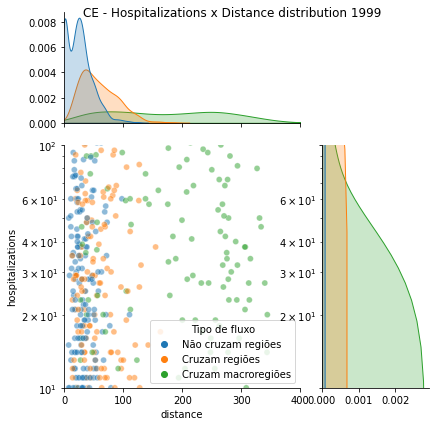

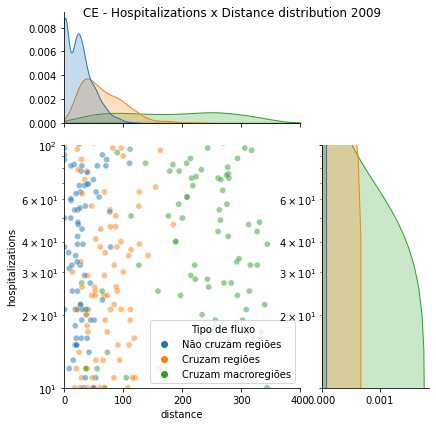

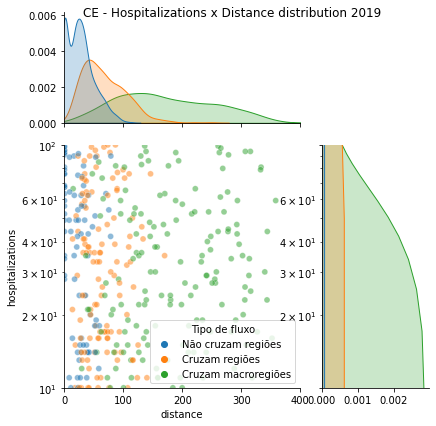

In [68]:
def plot_jointplot(year):
    y_col = "hospitalizations"
    x_col = "distance"
    hue_col = "Tipo de fluxo"
    g = sns.jointplot(data=df[df.year==year], x=x_col, y=y_col, hue=hue_col, #kind='hist', 
                      hue_order = ['Não cruzam regiões', 'Cruzam regiões', 'Cruzam macroregiões'], 
                      ratio=2, alpha=0.5, marginal_ticks=True)#, marginal_kws={'multiple': 'stack'})
    g.fig.suptitle('%s - Hospitalizations x Distance distribution %d'%(UF, year))
    g.ax_joint.set_yscale('log')
    g.ax_marg_x.set_xlim(-1, 400)
    return g

plot_jointplot(1999)
plot_jointplot(2009)
plot_jointplot(2019)